<a href="https://colab.research.google.com/github/samdemarinis/samdemarinis.github.io/blob/main/Final_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Song Popularity
Sam DeMarinis and Nick Radwin

Link to our webpage

# Project Goals
The goal of this project is to understand what features of a song are strongly associated with high popularity in order to build an accurate model that predicts a given song's popularity. We will be incorporating datasets found online that have utilized Spotify's API as well as creating our own to see how a prediction for a song's popularity may change over time. Lastly, we will be utilizing Billboard Top 100 Data to investigate the relationship between popularity on one platform versus another.

#Key Questions to Answer


*   How can we build an accurate model to predict a song's popularity based off a set of features?

*   What features provided by Spotify's API are the most important in predicting song popularity? And in contrast, which features hurt the model?


*   How does the model that we built on the pre-packaged dataset "Spotify Tracks Dataset" compare to the model that we built on our own dataset? 

*   List item





#Spotify Tracks Dataset

The first dataset that we are working with is the Spotify Tracks Dataset available on Kaggle (https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset). This dataset was constructed by the Kaggle user @MAHARSHIPANDYA in 2022 using Spotify's API. It contains almost 120,000 rows each corresponding to a song on Spotify. While the method for selecting the songs is not clearly stated, it can be assumed that it was a randomized process due to the large variety of songs. The columns of the dataset describe features of the songs, ranging from basic identifiers such as *track_id* and and *album_name* to more musical qualities such as *energy* and *danceability*. The full breakdown of what each variable entails can be found under the Column Description of the Spotify Tracks Dataset, linked above.

#Methods for Quantifiying Subjective Variables

The variable that we are interested in predicting is *popularity*. We will eventually build a model that will be fit to our training data and tested on subsets of our data. But how does one measure things like popularity, energy, or danceability? Spotify Web API describes how these seemingly subjective measures were calculated. Below is a list of the most subjective variables in the dataset and how they were calculated.

**popularity**: "The value will be between 0 and 100, with 100 being the most popular. The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are."

**danceability**: "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable."

**energy**: "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale."

**speechiness**: "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."

**liveness**: "Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live."

**valence**: "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

**mode**: "Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0."


Now that we understand how these variables were quantified, we can properly assess their level subjectivity. *popularity*, the label we will eventually be predicting, is based on an algorithm involving a track's plays. This variable is not very subjective. However, variables like *danceability* and *valence* still contain some subjectivity. Knowing this and what it is we want to predict, we can begin extracting, transforming, and loading this dataset.

#Extracting, Transforming, and Loading: Spotify Tracks Dataset

First, we must mount our Google Drive and change the directory to our Drive.

In [1]:
from google.colab import drive
import pandas as pd
import pylab as pl

drive.mount('/content/drive')
%cd /content/drive/My Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


Reading in the Spotify Tracks Datatset csv file and making a copy:

In [2]:
spotify_df = pd.read_csv("dataset.csv")
spotify_df_copy = spotify_df.copy()
spotify_df_copy

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


The dataset already seems to be pretty tidy, but there is some more tidying to be done. There is an extra column with no purpose, so we can go ahead and remove it:

In [3]:
spotify_df_copy.drop(columns=["Unnamed: 0"], inplace=True)

We should always check the dtypes for each of our variables. Pandas may misinterpret certain variables as categorical instead of quanitative, or vice versa. Luckily, we can see that pandas correctly interpreted the dtype for each variable in our DataFrame:

In [4]:
spotify_df_copy.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

We should also check for duplicate and NaN values in our DataFrame:

In [5]:
spotify_df_copy.duplicated().sum()

450

In [6]:
spotify_df_copy.isnull().sum().sum()

3

We can now drop the duplicate rows and rows containing NaNs:

In [7]:
# we need to do some tidying; there are repeat observations! because some tracks are listed as having multiple genres
# should I combine each track's genres so that there's just one row per song? will multiple rows of the same song affect my model?
spotify_df_copy.drop_duplicates(inplace=True)
spotify_df_copy.dropna(inplace=True)
spotify_df_copy

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


Our DataFrame is now in great shape for analysis. An important note to make is that, while we requested for pandas to drop duplicate rows (or tracks) in our DataFrame, there are still multiple rows that are the same song. This is due to the fact that some songs are listed as being in more than one genre, and for each genre they fall into they are entered another time into the dataset. pandas does not interpret these rows as being duplicates because they differ on the *track_genre* variable. To see this, let's look up all rows that have a specific *track_id*:

In [8]:
spotify_df_copy[(spotify_df_copy['track_id'] == "2QjOHCTQ1Jl3zawyYOpxh6")]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,4,alt-rock
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,4,alternative
81853,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,4,pop
91002,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,4,rock


Since we are interested in analyzing and eventually creating a model to predict the *popularity* of a song, let's look up songs with a popularity rating greater than 90:

In [9]:
# let's look at songs with high popularity:
spotify_df_copy["popularity"].unique()
popular_songs = spotify_df_copy[(spotify_df_copy["popularity"]  >= 90)]["track_id"].unique()
popular_songs

array(['2QjOHCTQ1Jl3zawyYOpxh6', '3JvKfv6T31zO0ini8iNItO',
       '5IgjP7X4th6nMNDh4akUHb', '3nqQXoyQOWXiESFLlDF1hG',
       '4uUG5RXrOk84mYEfFvj3cK', '0mBP9X2gPCuapvpZ7TGDk3',
       '0hquQWY3xvYqN4qtiquniF', '4C6Uex2ILwJi9sZXRdmqXp',
       '4zN21mbAuaD0WqtmaTZZeP', '1xzi1Jcr7mEi9K2RfzLOqS',
       '1Fid2jjqsHViMX6xNH70hE', '5XeFesFbtLpXzIVDNQP22n',
       '3F5CgOj3wFlRv51JsHbxhe', '38T0tPVZHcPZyhtOcCP7pF',
       '2tTmW7RDtMQtBk7m2rYeSw', '5ww2BF9slyYgNOk37BlC4u',
       '6Sq7ltF9Qa7SNFBsV5Cogx', '1IHWl5LamUGEuP4ozKQSXZ',
       '3k3NWokhRRkEPhCzPmV8TW', '5Eax0qFko2dh7Rl2lYs3bx',
       '2rurDawMfoKP4uHyb2kJBt', '6Xom58OOXk2SoU711L2IXO',
       '31i56LZnwE6uSu3exoHjtB', '79HZAZNnOE97rb2hnI0XQr',
       '41oY4WCTj5kccfesTVFnvN', '6i1g5ZRmJZAkDwBaUZ3f2i',
       '4tYFy8ALRjIZvnvSLw5lxN', '1797zYiX4cKosMH836X9Gt',
       '4h9wh7iOZ0GGn8QVp4RAOB', '75FEaRjZTKLhTrFGsfMUXR',
       '0VjIjW4GlUZAMYd2vXMi3b', '7MXVkk9YMctZqd1Srtv4MB',
       '58HvfVOeJY7lUuCqF0m3ly', '2eAvDnpXP5W0cVtiI0PUxV

Let's say that we are interested in looking at the *energy* of these popular songs, and if there is a common trend for this variable:

In [10]:
# let's look at the energy of these songs:
energy_list = []

for i in popular_songs:
  x = spotify_df_copy[(spotify_df_copy['track_id'] == i)]["energy"].iloc[0]
  energy_list.append(x)

data = {'track_id':popular_songs,
        'energy':energy_list}
        
df_pop_energy = pd.DataFrame(data, index=range(0,43))
df_pop_energy.head()

,track_id,energy
0,2QjOHCTQ1Jl3zawyYOpxh6,0.807
1,3JvKfv6T31zO0ini8iNItO,0.537
2,5IgjP7X4th6nMNDh4akUHb,0.690
3,3nqQXoyQOWXiESFLlDF1hG,0.472
4,4uUG5RXrOk84mYEfFvj3cK,0.965


Text(0, 0.5, 'Frequency')

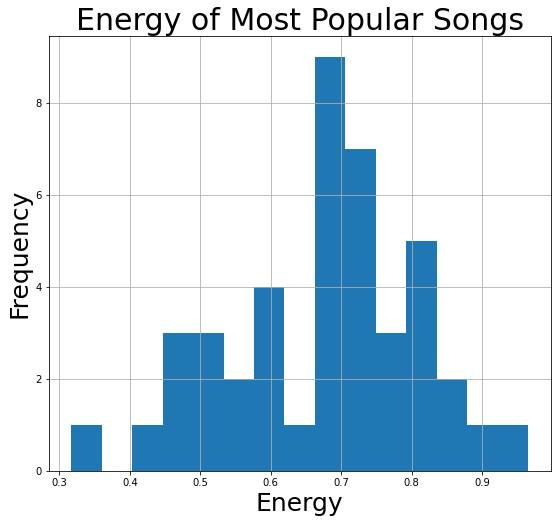

In [11]:
df_pop_energy.hist(bins=15, figsize = (9, 8), xlabelsize=10, ylabelsize=10)
pl.title("Energy of Most Popular Songs", size=30)
pl.xlabel("Energy", size=25)
pl.ylabel("Frequency", size=25)

From the histogram alone, we can see that the most common energy rating among the most popular songs in the dataset was around 0.7 out of 1. 

Now, let's take a look at the most common genres of the most popular songs:

Text(0, 0.5, 'Count')

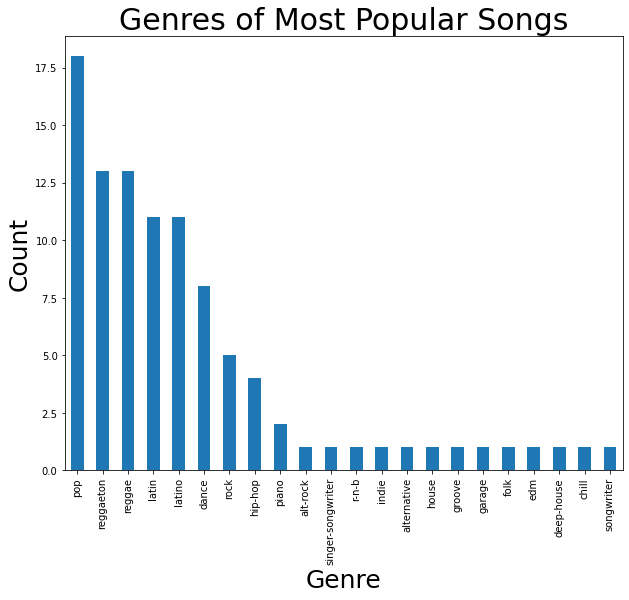

In [12]:
# let's see the genre-breakdown of these popular songs
from matplotlib import pyplot as plt

popular_songs_df = spotify_df_copy[(spotify_df_copy["popularity"]  >= 90)]

popular_songs_df["track_genre"].value_counts().plot.bar(figsize=(10,8))
plt.title("Genres of Most Popular Songs", size=30)
plt.xlabel("Genre", size=25)
plt.ylabel("Count", size=25)

We can now see the distribution of genres among the most popular songs. Unsurprisingly, the most common genre of the most popular songs is pop.

#Creating a Predictive Model for Song Popularity

Making a predictive model using KNN and cross validation on Spotify Tracks dataset:

In [16]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

# get the features (in dict format) and the labels
# (do not split into training and validation sets)
features = ["duration_ms", 
            "explicit", "danceability",
            "energy","key",
            "loudness", "mode", "acousticness",
            "instrumentalness", "valence", "tempo", "track_genre"]
X_dict = spotify_df_copy[features].to_dict(orient="records")
y = spotify_df_copy["popularity"]

# specify the pipeline
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=10)
pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])

In [17]:
#from sklearn.model_selection import cross_val_score
#
#scores = cross_val_score(pipeline, X_dict, y, 
#                         cv=3, scoring="neg_mean_squared_error")
#scores

array([-487.6735675 , -524.74528137, -482.15247246])

In [15]:
#np.mean(-scores)

NameError: ignored

In [ ]:
#np.sqrt(np.mean(-scores))

# Creating Our Own Dataset Using Spotipy

In [18]:
# installing spotipy

!pip install urllib3
!pip install requests
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 140 kB 29.2 MB/s 
     |████████████████████████████████| 246 kB 51.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [19]:
from fastai.collab import *
from fastai.tabular import *
import pandas as pd
import numpy as np
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth

In [20]:
## inputting my Spotify credentials

CLIENT_ID = "92f8907c269f4703917254ec2454f4c7"
CLIENT_SECRET = "fea4962791dd466d840feba0e11a11df"
username = "sam7303"
market = ['US']
redirect_uri = 'http://127.0.0.1:9090'
scope="user-library-read"

In [24]:
# creating spotipy object

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=CLIENT_ID,
                                               client_secret=CLIENT_SECRET,
                                               redirect_uri=redirect_uri,
                                               scope="user-library-read", open_browser=False),)

In [25]:
# "Today's Top Hits" playlist -- 50 of the most popular songs

PLAYLIST_ID = '37i9dQZF1DXcBWIGoYBM5M'
playlist_tracks = sp.user_playlist_tracks(CLIENT_ID, PLAYLIST_ID, fields='items,uri,name,id,total')

Go to the following URL: https://accounts.spotify.com/authorize?client_id=92f8907c269f4703917254ec2454f4c7&response_type=code&redirect_uri=http%3A%2F%2F127.0.0.1%3A9090&scope=user-library-read
Enter the URL you were redirected to: http://127.0.0.1:9090/?code=AQBBwblNRtbfXHXTxrSaA2NP3Wgwj4c1YA-ragaraVq-dECPEIVE77t84Jn-VLuD8eixITLQOONmmoZKdMcEL70GhEfxwPoLppfVYzIUcC3xK-Ry6-Pz8Q7sZH5DUBse_qKVF-x_ThmTBuVtjYEwF4G2R76k2JFpIHjj6sMWOAW95Rzb1pJfahMv61I


In [26]:
## getting the song ID for all 50

songIDs, artistIDs = [], []

#Find the name, artist, and ID for each song in the playlist
for i in range(len(playlist_tracks['items'])):
  artistIDs.append(playlist_tracks['items'][i]['track']['artists'][0]['id']) #Append artist IDs to a list
  songIDs.append(playlist_tracks['items'][i]['track']['id']) #Append song IDs to a list
  
print(songIDs)
#print(artistIDs)
len(songIDs)

['2KLwPaRDOB87XOYAT2fgxh', '34ZAzO78a5DAVNrYIGWcPm', '3nqQXoyQOWXiESFLlDF1hG', '0V3wPSX9ygBnCm8psDIegu', '0XER3HPMx223xWaAgNKp4Y', '35ovElsgyAtQwYPYnZJECg', '4LRPiXqCikLlN15c3yImP7', '4uUG5RXrOk84mYEfFvj3cK', '1xzi1Jcr7mEi9K2RfzLOqS', '0WtM2NBVQNNJLh6scP13H8', '73vIOb4Q7YN6HeJTbscRx5', '5jQI2r1RdgtuT8S3iG8zFC', '4h9wh7iOZ0GGn8QVp4RAOB', '5ww2BF9slyYgNOk37BlC4u', '5IgjP7X4th6nMNDh4akUHb', '38T0tPVZHcPZyhtOcCP7pF', '0O6u0VJ46W86TxN9wgyqDj', '0QHEIqNKsMoOY5urbzN48u', '1qEmFfgcLObUfQm0j1W2CK', '1IHWl5LamUGEuP4ozKQSXZ', '4C6Uex2ILwJi9sZXRdmqXp', '5odlY52u43F5BjByhxg7wg', '0HqZX76SFLDz2aW8aiqi7G', '1PckUlxKqWQs3RlWXVBLw3', '76OGwb5RA9h4FxQPT33ekc', '6G12ZafqofSq7YtrMqUm76', '0hquQWY3xvYqN4qtiquniF', '5CM4UuQ9Gnd6K2YyKGPMoK', '39JofJHEtg8I4fSyo7Imft', '72yP0DUlWPyH8P7IoxskwN', '0mBP9X2gPCuapvpZ7TGDk3', '1Ame8XTX6QHY0l0ahqUhgv', '3WMj8moIAXJhHsyLaqIIHI', '59nOXPmaKlBfGMDeOVGrIK', '2tTmW7RDtMQtBk7m2rYeSw', '2TktkzfozZifbQhXjT6I33', '2rmwqU7yzTvzkiaRV53DpT', '5hnGrTBaEsdukpDF6aZg8a', '5uSFGgIfHM

50

In [27]:
track_info = sp.track("2KLwPaRDOB87XOYAT2fgxh")
track_features = sp.audio_features('2KLwPaRDOB87XOYAT2fgxh')

name = track_info['name']
album = track_info['album']['name']
artist = track_info['album']['artists'][0]['name']
release_date = track_info['album']['release_date']
length = track_info['duration_ms']
popularity = track_info['popularity']
explicit = track_info['explicit']
#genre = track_info['genre']
# currently, spotify does not list the specific genre a track falls in. instead it offers the genres associated to the artist

acousticness = track_features[0]['acousticness']
danceability = track_features[0]['danceability']
energy = track_features[0]['energy']
instrumentalness = track_features[0]['instrumentalness']
liveness = track_features[0]['liveness']
loudness = track_features[0]['loudness']
speechiness = track_features[0]['speechiness']
tempo = track_features[0]['tempo']
time_signature = track_features[0]['time_signature']
key = track_features[0]["key"]
mode = track_features[0]["mode"]
valence = track_features[0]["valence"]


track = [name, album, artist, release_date, length, popularity, acousticness, danceability, energy]

In [28]:
result = sp.search("The Neighbourhood")
track = result['tracks']['items'][0]

artist = sp.artist(track["artists"][0]["external_urls"]["spotify"])
print("artist genres:", artist["genres"])

artist genres: ['modern alternative rock', 'modern rock', 'pop', 'shimmer pop']


In [29]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb

[NbConvertApp] WARNING | pattern '/PATH/TO/YOUR/NOTEBOOKFILE.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True

CalledProcessError: ignored